#Portfolio Optimization Visual Using Plotly

In [ ]:
!pip install chart-studio

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd

In [ ]:
np.random.seed(123)
solvers.options['show_progress'] = False

In [ ]:
import plotly
import cufflinks
from chart_studio import plotly

In [ ]:
import plotly.tools as tls   
from plotly.graph_objs import *

In [ ]:
n_assets = 4
n_obs = 1000
return_vec = np.random.randn(n_assets, n_obs)

In [ ]:
fig = plt.figure()
plt.plot(return_vec.T, alpha=.4);
plt.xlabel('time')
plt.ylabel('returns')

In [ ]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

print (rand_weights(n_assets))
print (rand_weights(n_assets))

[0.24354746 0.16728225 0.19603096 0.39313932]
[0.16483208 0.3587624  0.43760957 0.03879595]


In [ ]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

In [ ]:
n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in range(n_portfolios)
])

Text(0.5, 1.0, 'Mean and standard deviation of returns of randomly generated portfolios')

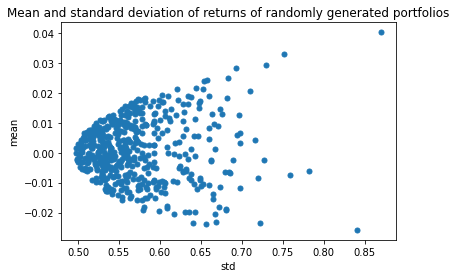

In [ ]:
fig = plt.figure()
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')


     pcost       dcost       gap    pres   dres
 0:  8.5516e-03 -1.0316e+00  1e+00  0e+00  3e+00
 1:  7.1043e-03 -3.9703e-02  5e-02  2e-16  1e-01
 2: -4.4582e-03 -1.4056e-02  1e-02  1e-16  1e-17
 3: -6.1566e-03 -6.9046e-03  7e-04  2e-16  3e-18
 4: -6.5076e-03 -6.5233e-03  2e-05  3e-17  7e-18
 5: -6.5178e-03 -6.5180e-03  2e-07  8e-17  1e-17
 6: -6.5179e-03 -6.5179e-03  2e-09  1e-17  8e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0123e-02 -1.0295e+00  1e+00  2e-16  3e+00
 1:  8.7203e-03 -3.7437e-02  5e-02  1e-16  1e-01
 2: -1.5695e-03 -1.0237e-02  9e-03  8e-17  1e-17
 3: -3.0799e-03 -3.7440e-03  7e-04  6e-17  9e-18
 4: -3.4236e-03 -3.4436e-03  2e-05  1e-16  1e-17
 5: -3.4400e-03 -3.4402e-03  2e-07  1e-16  3e-17
 6: -3.4402e-03 -3.4402e-03  2e-09  8e-17  6e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1883e-02 -1.0272e+00  1e+00  3e-16  3e+00
 1:  1.0529e-02 -3.4917e-02  5e-02  8e-17  1e-01
 2:  1.4284e-03 -6.2988e

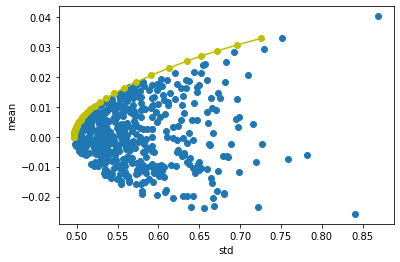

In [ ]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(return_vec)

fig = plt.figure()
plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')

In [ ]:
print (weights)

[[2.34462764e-02]
 [2.31187453e-08]
 [3.85490013e-07]
 [9.76553315e-01]]


In [ ]:
!pip install zipline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.4 MB 4.1 MB/s 
     |████████████████████████████████| 85 kB 4.8 MB/s 
     |████████████████████████████████| 11.3 MB 31.5 MB/s 
  Installing build dependencies ... error
     |████████████████████████████████| 11.3 MB 48.3 MB/s 
  Installing build dependencies ... error
     |████████████████████████████████| 11.3 MB 7.9 MB/s 
  Installing build dependencies ... error
     |████████████████████████████████| 10.4 MB 24.5 MB/s 
     |████████████████████████████████| 107 kB 48.6 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
     |████████████████████████████████| 108 kB 54.7 MB/s 
     |████████████████████████████████| 209 kB 52.4 MB/s 
     |████████████████████████████████| 1.5 MB 48.1 MB/s 
     |████████████████████████████████| 355 kB 53.3 MB/s 
     |████████████████████████████████| 1.3 MB 47.5 MB/s 
     |█████████████████

In [ ]:
from zipline.utils.factory import load_bars_from_yahoo
end = pd.Timestamp.utcnow()
start = end - 2500 * pd.tseries.offsets.BDay()

data = load_bars_from_yahoo(stocks=['IBM', 'GLD', 'XOM', 'AAPL', 
                                    'MSFT', 'TLT', 'GS'],
                            start=start, end=end)